In [1]:
# Importing Necessary Packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Full range of latitude and longitude
range_lat = (-90, 90)
range_long = (-180, 180)

In [3]:
# Full range of latitude and longitude
range_lat = (-90, 90)
range_long = (-180, 180)

# Create a placeholder list to store data
lat_longs = []
cities = []

# Creating a random set of coordinates using np.random 
lats = np.random.uniform(range_lat[0], range_lat[1], size=1500)
longs = np.random.uniform(range_long[0], range_long[1], size=1500)
lat_longs = zip(lats, longs)

# Determining nearest city for each randomly picked coordinate
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # We need to avoid duplicates, so only add unique cities to list
    if city not in cities:
        cities.append(city)

# Question asks for >500 cities, need to confirm the length of cities array
len(cities)

610

## Perform API Calls

In [4]:
# Initializing API key and calling
api_key = "16c29d1f4f634eccedc1df4a5b364353"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Creating placeholder array to store city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        print("End of set. Sleeping for 60 seconds.")
        

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Tells user that data retrieval is complete
print("Data Retrieval Complete      ")

        
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | along
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | parainen
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | montecristo
Processing Record 13 of Set 1 | lerwick
Processing Record 14 of Set 1 | pemangkat
Processing Record 15 of Set 1 | tombouctou
Processing Record 16 of Set 1 | jacareacanga
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | longonjo
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of Set 1 | zhigansk
Process

Processing Record 32 of Set 4 | lagoa
Processing Record 33 of Set 4 | lakes entrance
Processing Record 34 of Set 4 | margate
Processing Record 35 of Set 4 | mabaruma
Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | nuevo ideal
Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | el badari
City not found. Skipping...
Processing Record 41 of Set 4 | bonnyville
Processing Record 42 of Set 4 | colonia leopoldina
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | eureka
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | shush
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | petropavlovsk-kamchatskiy
End of set. Sleeping for 60 seconds.
Processing Record 0 of Set 5 | poum
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | matara
Processing Record 3 of Set 5 | seymchan
Process

Processing Record 18 of Set 8 | kruisfontein
Processing Record 19 of Set 8 | guantanamo
Processing Record 20 of Set 8 | bremerton
Processing Record 21 of Set 8 | laem sing
Processing Record 22 of Set 8 | pevek
Processing Record 23 of Set 8 | gizo
Processing Record 24 of Set 8 | siniscola
Processing Record 25 of Set 8 | mullovka
Processing Record 26 of Set 8 | ahuimanu
Processing Record 27 of Set 8 | rawson
Processing Record 28 of Set 8 | mehamn
Processing Record 29 of Set 8 | talaya
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 33 of Set 8 | tapaua
City not found. Skipping...
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | zhezkazgan
Processing Record 36 of Set 8 | homer
Processing Record 37 of Set 8 | boden
Processing Record 38 of Set 8 | awbari
Processing Record 39 of Set 8 | dongfeng
Processing Record 40 of Set 8 | namatanai
Processi

Processing Record 5 of Set 12 | waipawa
Processing Record 6 of Set 12 | virginia beach
Processing Record 7 of Set 12 | tabuk
Processing Record 8 of Set 12 | honiara
Processing Record 9 of Set 12 | kuito
Processing Record 10 of Set 12 | pampa
Processing Record 11 of Set 12 | jasper
Processing Record 12 of Set 12 | clyde river
Processing Record 13 of Set 12 | brazzaville
Processing Record 14 of Set 12 | bideford
Processing Record 15 of Set 12 | phan rang
City not found. Skipping...
Processing Record 16 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 12 | merauke
Processing Record 18 of Set 12 | huilong
Processing Record 19 of Set 12 | campamento
Processing Record 20 of Set 12 | kerema
Processing Record 21 of Set 12 | solntsevo
Processing Record 22 of Set 12 | padang
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | dyersburg
Processing Record 25 of Set 12 | samusu
City not found. Skipping...
Processing Record 26 of Set 12 | blagoyevo
P

In [5]:
# Converting array above into pandas dataframe
city_data_pd = pd.DataFrame(city_data)

# Viewing dataframe
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,82.38,81,40,11.50,US,1659244472
1,busselton,-33.6500,115.3333,57.16,69,71,11.86,AU,1659244486
2,bengkulu,-3.8004,102.2655,84.67,64,99,5.39,ID,1659244188
3,along,28.1667,94.7667,77.67,96,98,2.44,IN,1659244913
4,ponta do sol,32.6667,-17.1000,70.72,82,12,5.26,PT,1659244913


In [6]:

city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.00000,561.000000,561.000000,5.610000e+02
mean,19.751008,18.174725,69.347166,71.13369,56.474153,7.909964,1.659245e+09
std,33.659061,90.667939,13.740990,19.51405,38.679172,5.491639,2.296926e+02
min,-54.800000,-175.200000,30.150000,1.00000,0.000000,0.000000,1.659244e+09
25%,-8.103000,-62.996700,58.980000,59.00000,18.000000,3.780000,1.659245e+09
50%,22.890900,21.024700,71.420000,75.00000,67.000000,6.620000,1.659245e+09
75%,47.840500,94.766700,79.920000,86.00000,98.000000,10.800000,1.659245e+09
max,78.218600,179.316700,100.980000,100.00000,100.000000,29.370000,1.659245e+09


In [7]:
#  Fetching indices of cities where the humidity is >100%
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Creating a new dataframe without cities where humidity > 100%
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,82.38,81,40,11.50,US,1659244472
1,busselton,-33.6500,115.3333,57.16,69,71,11.86,AU,1659244486
2,bengkulu,-3.8004,102.2655,84.67,64,99,5.39,ID,1659244188
3,along,28.1667,94.7667,77.67,96,98,2.44,IN,1659244913
4,ponta do sol,32.6667,-17.1000,70.72,82,12,5.26,PT,1659244913


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

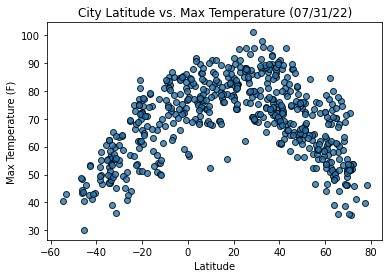

In [10]:
# ----LATITUDE VS TEMP PLOTTING----
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
#plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

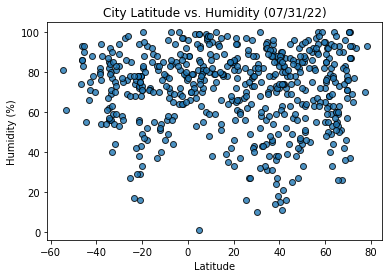

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

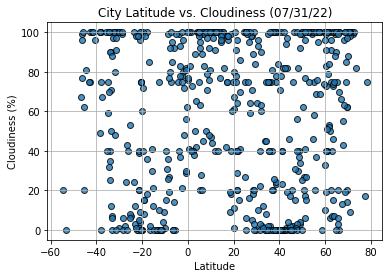

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

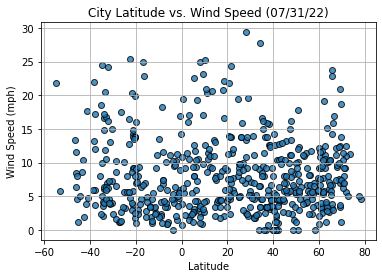

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.3837585952770439


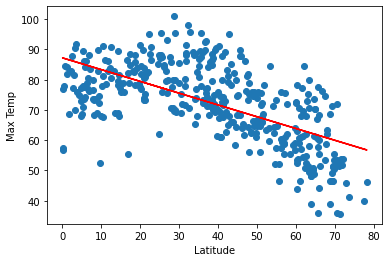

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.5836605273137019


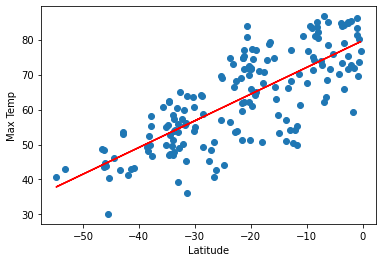

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004395232294380688


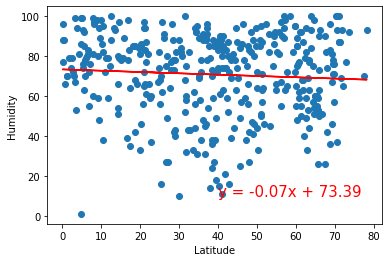

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 4.549404269405497e-05


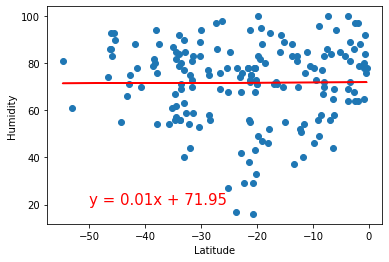

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0032210022408757006


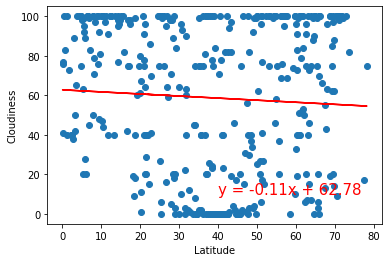

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.020019139991310598


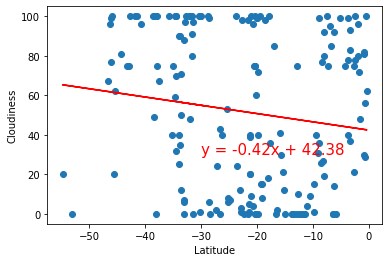

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004222955066837086


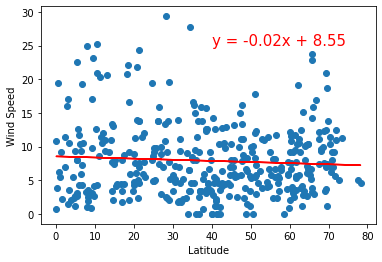

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.04341977480126121


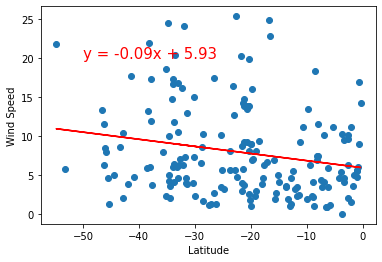

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))